_____

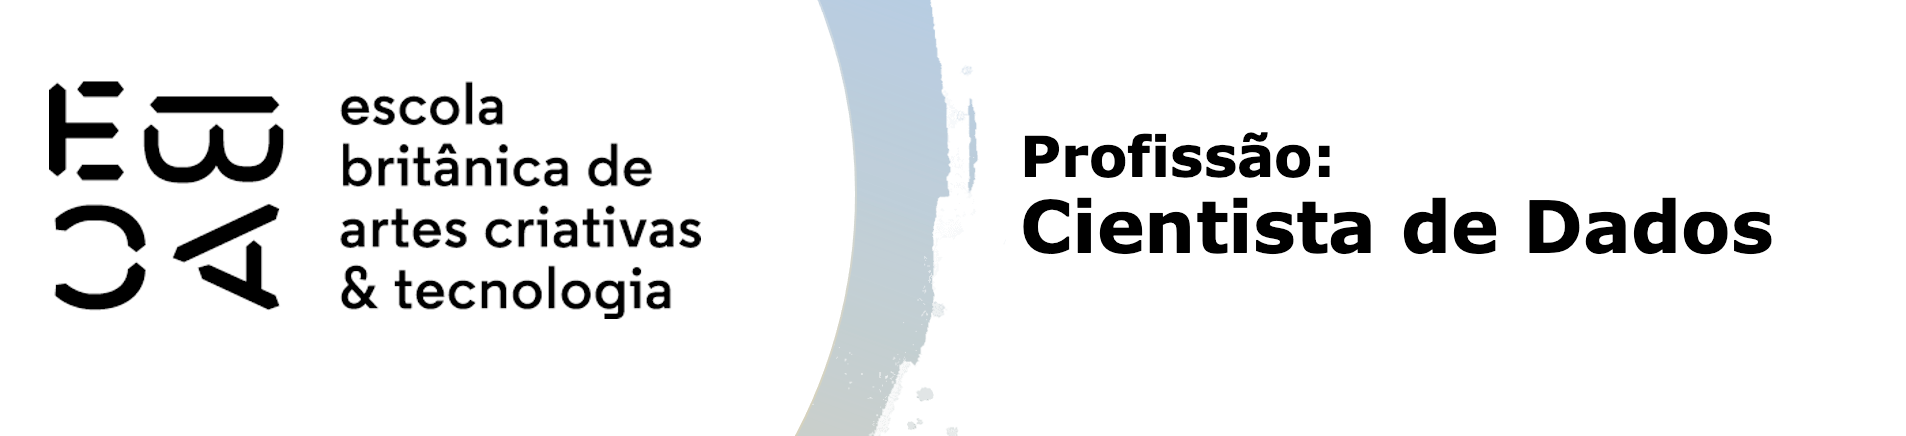

_____

### Aluno: Victor Resende

_____

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score


In [6]:
df = pd.read_csv('online_shoppers_intention.csv')

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

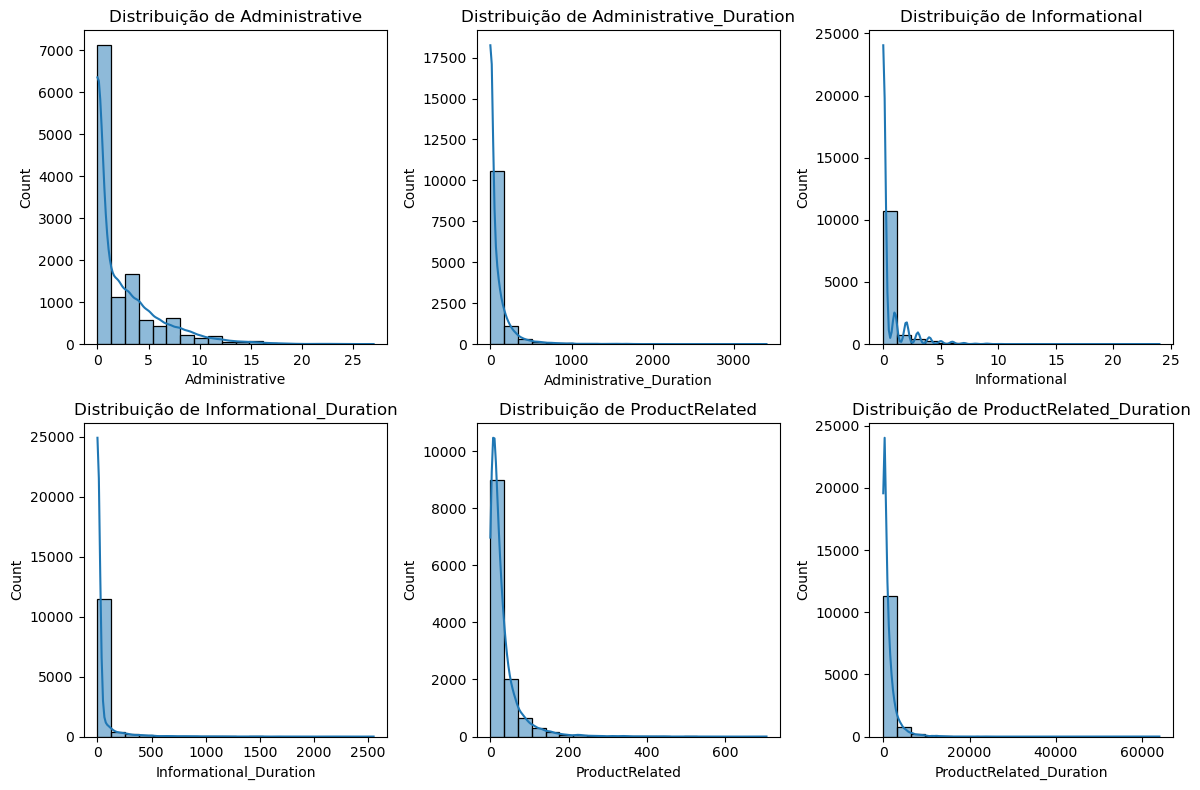

Valores faltantes por variável:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64


In [10]:
# Análise descritiva das variáveis
# Selecionando as variáveis de interesse
variaveis_navegacao = ['Administrative', 'Administrative_Duration', 'Informational', 
                       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Estatísticas descritivas
df[variaveis_navegacao].describe()

# Verificando a existência de valores missing:
missing_values = df[variaveis_navegacao].isnull().sum()

# Visualização da distribuição das variáveis com histograma:
plt.figure(figsize=(12, 8))
for i, col in enumerate(variaveis_navegacao, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Visualizando os missing values:
print("Valores faltantes por variável:")
print(missing_values)

# Tratamento de valores missing (caso existam)
# Se houver valores faltantes, podemos preencher com a média ou outra estratégia
df[variaveis_navegacao] = df[variaveis_navegacao].fillna(df[variaveis_navegacao].mean())


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

## 1. Método do Cotovelo

Este método consiste em calcular a soma dos erros quadrados (SSE, também conhecido como inércia) para diferentes números de clusters e observar a "inflexão" (cotovelo) onde o ganho de redução de erro começa a ser menos significativo.

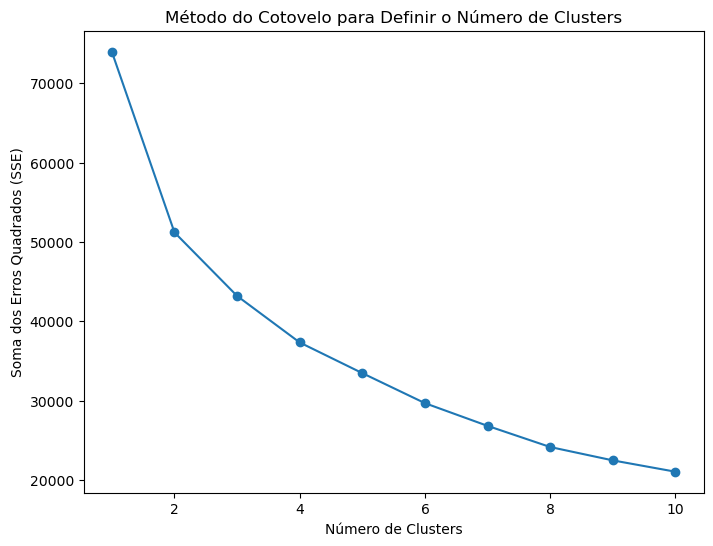

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variaveis_navegacao])

# Calculando SSE para diferentes números de clusters
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plotando o Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.title('Método do Cotovelo para Definir o Número de Clusters')
plt.show()


## 2. Coeficiente de Silhueta

Avalia o quão bem cada ponto está agrupado com outros pontos em seu cluster e quão distante está de outros clusters. Um valor próximo de 1 indica que os pontos estão bem agrupados.

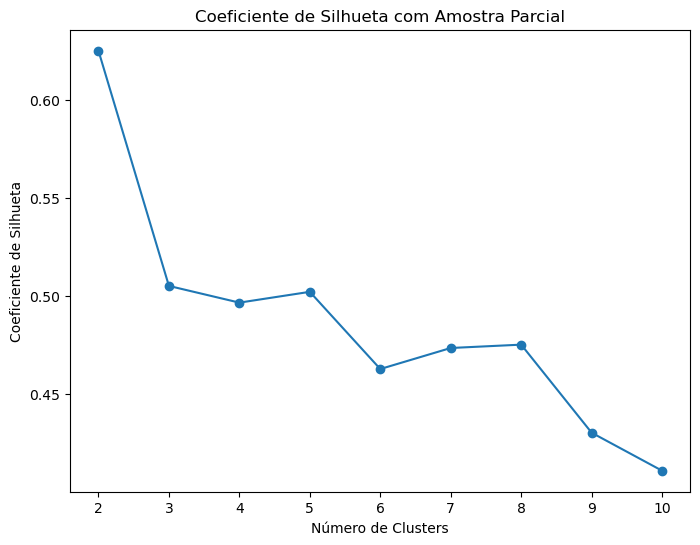

In [27]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    # Avaliar o coeficiente de Silhueta com uma amostra dos dados:
    silhouette_scores.append(silhouette_score(df_scaled, labels, sample_size=2000, random_state=42))

# Plotando o Coeficiente de Silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta com Amostra Parcial')
plt.show()


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [ ]:
# Implementação do K-Means para 3 e 5 clusters (sugeridos pelos métodos)
# K-Means com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster_3'] = kmeans_3.fit_predict(df_scaled)

# Renomeando os clusters de 3 grupos com base no comportamento identificado
cluster_names_3 = {
    0: "Navegação Moderada",
    1: "Navegação Intensiva em Produtos",
    2: "Diversificação de Interesses"
}
df['cluster_3_nome'] = df['cluster_3'].map(cluster_names_3)

# K-Means com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['cluster_5'] = kmeans_5.fit_predict(df_scaled)

# Renomeando os clusters de 5 grupos com base no comportamento identificado
cluster_names_5 = {
    0: "Pouca Navegação",
    1: "Interesses Diversificados",
    2: "Foco em Informações",
    3: "Navegação Moderada em Produtos",
    4: "Navegação Intensiva em Produtos"
}
df['cluster_5_nome'] = df['cluster_5'].map(cluster_names_5)

In [64]:
# Análise descritiva dos clusters para 3 grupos
print("Análise descritiva para 3 clusters:")
df.groupby('cluster_3_nome')[variaveis_navegacao].mean()

Análise descritiva para 3 clusters:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_3_nome,,,,,,
Diversificação de Interesses,7.030909,267.072347,4.141818,469.30116,138.227273,5736.438462
Navegação Intensiva em Produtos,0.924445,24.873236,0.159790,6.52277,18.901725,688.500342
Navegação Moderada,6.554920,252.148432,0.996325,43.30954,56.697428,2103.627215


In [66]:
# Análise descritiva dos clusters para 5 grupos
print("\nAnálise descritiva para 5 clusters:")
df.groupby('cluster_5_nome')[variaveis_navegacao].mean()



Análise descritiva para 5 clusters:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_5_nome,,,,,,
Foco em Informações,4.747826,157.375951,3.581366,219.116502,50.580124,1958.050353
Interesses Diversificados,7.405594,333.739775,4.937063,1054.087069,110.692308,5447.913602
Navegação Intensiva em Produtos,6.759901,200.546256,1.608911,75.437074,191.995050,7462.340286
Navegação Moderada em Produtos,0.843664,22.154264,0.123522,4.082291,19.243840,703.322934
Pouca Navegação,6.900882,280.509657,0.442138,15.825655,43.051894,1554.425200


### Visualização dos resultados:

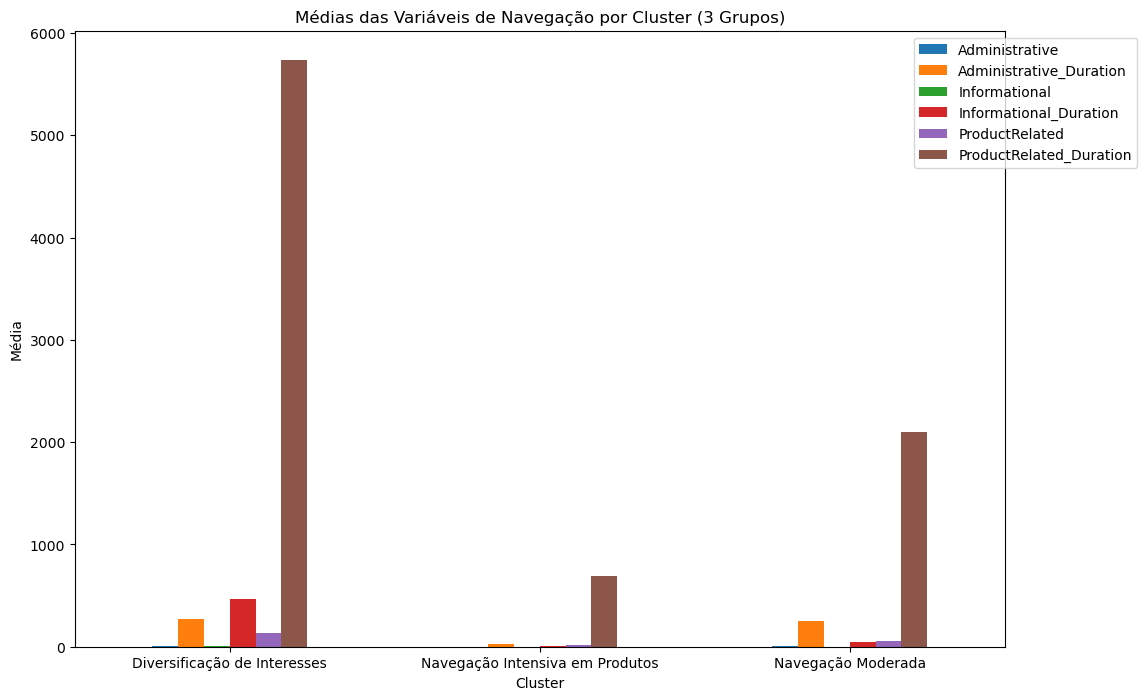

In [62]:
# Plotando as médias das variáveis de navegação para 3 clusters
cluster_3_means = df.groupby('cluster_3_nome')[variaveis_navegacao].mean()

# Configuração do gráfico para 3 clusters
cluster_3_means.plot(kind='bar', figsize=(12, 8))
plt.title('Médias das Variáveis de Navegação por Cluster (3 Grupos)')
plt.ylabel('Média')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


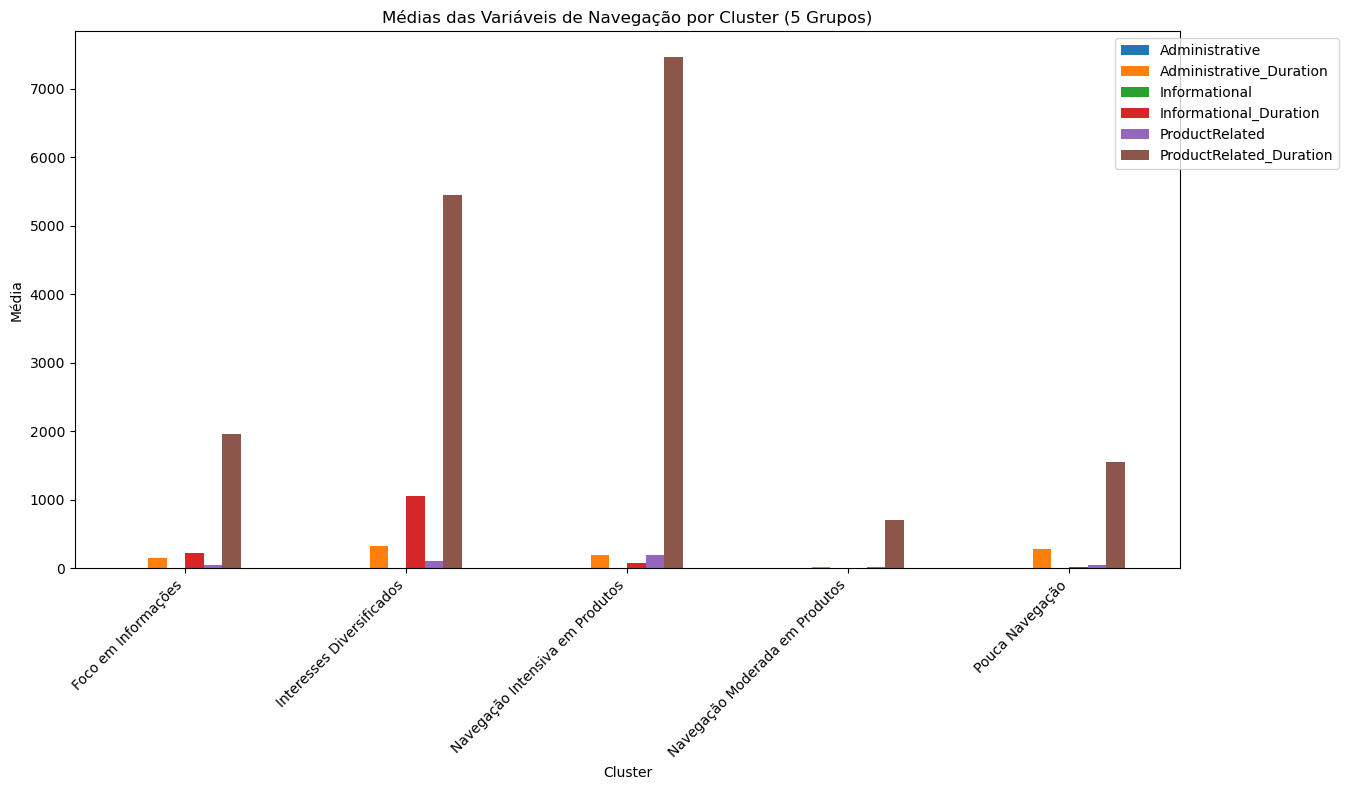

In [72]:
# Plotando as médias das variáveis de navegação para 5 clusters
cluster_5_means = df.groupby('cluster_5_nome')[variaveis_navegacao].mean()

# Configuração do gráfico para 5 clusters com ajustes
ax = cluster_5_means.plot(kind='bar', figsize=(12, 8))
plt.title('Médias das Variáveis de Navegação por Cluster (5 Grupos)')
plt.ylabel('Média')
plt.xlabel('Cluster')

# Ajustando rotação e espaçamento dos rótulos do eixo X
plt.xticks(rotation=45, ha='right')  # Rotação para 45 graus e alinhamento à direita
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

### Análise para 3 clusters:

In [76]:
# Mapeando os nomes dos clusters
cluster_3_nomes = {
    0: 'Navegação Moderada',
    1: 'Navegação Intensiva em Produtos',
    2: 'Diversificação de Interesses'
}

# Adicionando os nomes dos grupos no DataFrame
df['nome_cluster_3'] = df['cluster_3'].map(cluster_3_nomes)

# Agrupando por nome_cluster_3 e calculando as médias das variáveis BounceRates e Revenue
cluster_3_extra = df.groupby('nome_cluster_3')[['BounceRates', 'Revenue']].mean()

# Exibir as médias para análise
print("Médias das variáveis fora do escopo para 3 clusters:")
print(cluster_3_extra)



Médias das variáveis fora do escopo para 3 clusters:
                                 BounceRates   Revenue
nome_cluster_3                                        
Diversificação de Interesses        0.006775  0.305455
Navegação Intensiva em Produtos     0.027218  0.125174
Navegação Moderada                  0.006501  0.233565


### Análise para 5 clusters:

In [78]:
# Mapeando os nomes dos clusters
cluster_5_nomes = {
    0: 'Pouca Navegação',
    1: 'Interesses Diversificados',
    2: 'Foco em Informações',
    3: 'Navegação Moderada em Produtos',
    4: 'Navegação Intensiva em Produtos'
}

# Adicionando os nomes dos grupos no DataFrame
df['nome_cluster_5'] = df['cluster_5'].map(cluster_5_nomes)

# Agrupando por nome_cluster_5 e calculando as médias das variáveis BounceRates e Revenue
cluster_5_extra = df.groupby('nome_cluster_5')[['BounceRates', 'Revenue']].mean()

# Exibir as médias para análise
print("Médias das variáveis fora do escopo para 5 clusters:")
print(cluster_5_extra)



Médias das variáveis fora do escopo para 5 clusters:
                                 BounceRates   Revenue
nome_cluster_5                                        
Foco em Informações                 0.007831  0.242236
Interesses Diversificados           0.007350  0.293706
Navegação Intensiva em Produtos     0.005223  0.344059
Navegação Moderada em Produtos      0.027815  0.123633
Pouca Navegação                     0.006438  0.214323


### Visualização dos resultados:

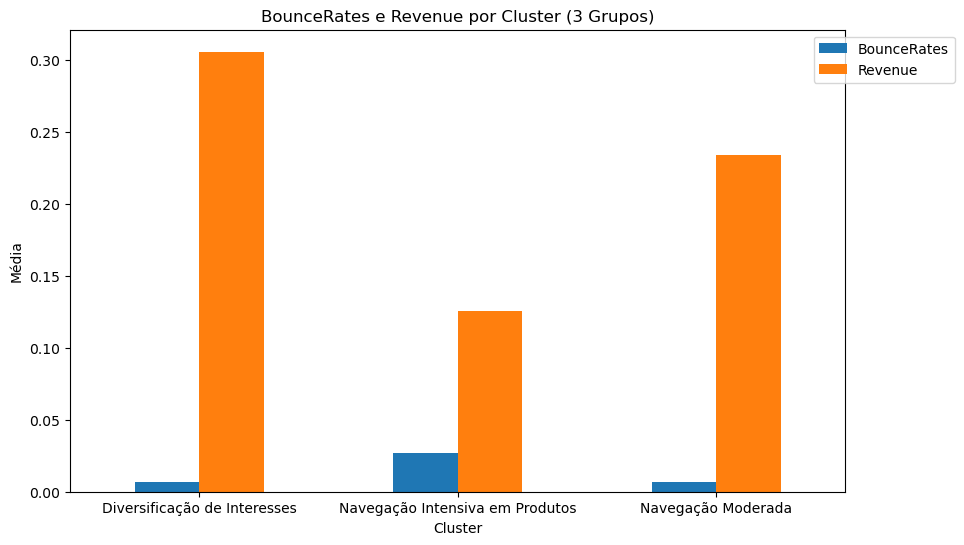

In [80]:
# Nomes dos grupos para 3 clusters
nomes_grupos_3 = {
    0: "Navegação Moderada",
    1: "Navegação Intensiva em Produtos",
    2: "Diversificação de Interesses"
}

# Renomeando os índices do DataFrame com os nomes dos grupos
cluster_3_extra.rename(index=nomes_grupos_3, inplace=True)

# Plotando as variáveis fora do escopo para 3 clusters
cluster_3_extra.plot(kind='bar', figsize=(10, 6))
plt.title('BounceRates e Revenue por Cluster (3 Grupos)')
plt.ylabel('Média')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


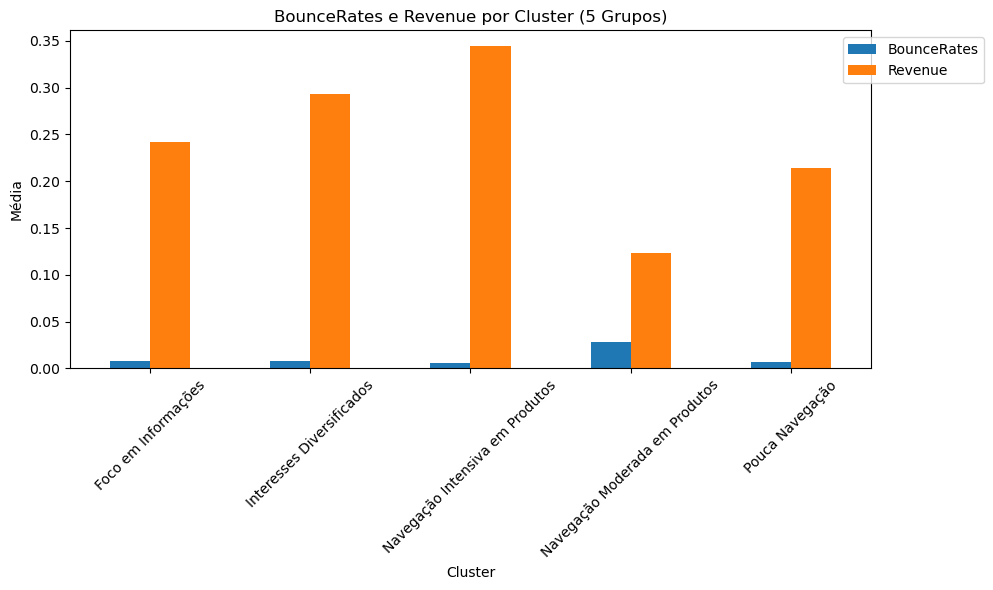

In [84]:
# Plotando as variáveis fora do escopo para 5 clusters
cluster_5_extra.plot(kind='bar', figsize=(10, 6))
plt.title('BounceRates e Revenue por Cluster (5 Grupos)')
plt.ylabel('Média')
plt.xlabel('Cluster')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


### Análise dos dados:

**Avaliação de propensão à compra:** <br>

**Revenue**: A variável Revenue indica se a sessão resultou em uma compra (1 = sim, 0 = não). O grupo com a maior média de Revenue será o grupo com maior propensão à compra.

**BounceRates**: Uma taxa de rejeição mais alta pode sugerir que os usuários saíram do site sem realizar nenhuma ação significativa. Grupos com menores taxas de BounceRates tendem a ser mais engajados e, possivelmente, mais propensos a compra.

**Conclusão**:

Com base na análise das médias de Revenue e BounceRates para cada cluster, podemos identificar qual grupo é mais propenso à compra. O grupo com maior média de Revenue e menor média de BounceRates terá clientes mais propensos à compra.

In [86]:
# Identificando o grupo mais propenso à compra para 3 clusters
grupo_mais_propenso_3 = cluster_3_extra.loc[cluster_3_extra['Revenue'].idxmax()]
grupo_menos_rejeicao_3 = cluster_3_extra.loc[cluster_3_extra['BounceRates'].idxmin()]

print(f"\nGrupo mais propenso à compra (3 Clusters): {grupo_mais_propenso_3.name}")
print(f"Média Revenue: {grupo_mais_propenso_3['Revenue']}, Média BounceRates: {grupo_mais_propenso_3['BounceRates']}")



Grupo mais propenso à compra (3 Clusters): Diversificação de Interesses
Média Revenue: 0.3054545454545455, Média BounceRates: 0.0067753521581818184


In [88]:
# Identificando o grupo mais propenso à compra para 5 clusters
grupo_mais_propenso_5 = cluster_5_extra.loc[cluster_5_extra['Revenue'].idxmax()]
grupo_menos_rejeicao_5 = cluster_5_extra.loc[cluster_5_extra['BounceRates'].idxmin()]

print(f"\nGrupo mais propenso à compra (5 Clusters): {grupo_mais_propenso_5.name}")
print(f"Média Revenue: {grupo_mais_propenso_5['Revenue']}, Média BounceRates: {grupo_mais_propenso_5['BounceRates']}")



Grupo mais propenso à compra (5 Clusters): Navegação Intensiva em Produtos
Média Revenue: 0.34405940594059403, Média BounceRates: 0.0052227562574257425


________________